In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
gal = gchop.center(gal)

In [4]:
rvir=297.470
gal = gchop.star_align(gal, r_cut=0.1*rvir)

In [5]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,-195699.620206,290.293111,-195409.327095,6.267166,-1.894153,-0.820925
1,stars,0,9.745897e+05,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,-196176.962277,274.782915,-195902.179362,1.531441,-3.975916,1.472102
2,stars,0,6.935776e+05,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,-195152.120168,193.699612,-194958.420557,-1.132945,5.869943,-3.448075
3,stars,0,1.070959e+06,-0.233303,-0.256464,-0.370506,-9.678900,-5.458488,-0.866013,0.0,-194695.767625,62.113089,-194633.654536,-1.800299,3.384044,-1.208809
4,stars,0,6.013803e+05,-0.075262,-0.200221,-0.282568,16.644463,8.046805,-16.925347,0.0,-195703.942688,314.128285,-195389.814402,5.662575,-5.977037,2.726944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,-85.899749,291.965507,-178.219934,-113.321459,-40.698785,-124.733209,0.0,-17314.963254,15028.258726,-2286.704528,-43671.129141,9481.591579,36581.972506
272643,gas,2,1.436841e+06,-155.732884,170.206676,-164.665238,-93.017512,-28.445627,-32.347611,0.0,-20910.620132,5253.889589,-15656.730543,-10189.785225,10279.164005,20262.120986
272644,gas,2,1.690580e+06,-116.936374,277.722266,-180.365217,-113.908933,-77.286989,-97.464865,0.0,-17358.735183,14223.961789,-3134.773394,-41008.047790,9148.021413,40672.707219
272645,gas,2,1.210975e+06,-153.286862,-87.825986,160.681922,-74.877268,28.624862,72.765247,0.0,-23427.833806,5860.384564,-17567.449242,-10990.177333,-877.466960,-10963.985096


# Descomposicion

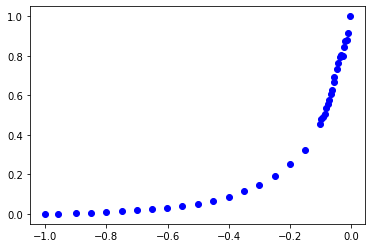

In [6]:
circ = gchop.utils.jcirc(gal)
plt.plot(circ.x,circ.y, 'bo')

## Threshold

In [7]:
decomposer = gchop.models.JThreshold()
cmp_labels = decomposer.decompose(gal)
labels_th = cmp_labels.labels[cmp_labels.ptypes == 'stars']
cmp_labels.describe()

Particles           Deterministic mass         
              Size  Fraction               Size Fraction
Spheroid     12785  0.342918       1.223594e+10  0.32792
Disk         24498  0.657082       2.507786e+10  0.67208

<AxesSubplot:xlabel='eps', ylabel='Density'>

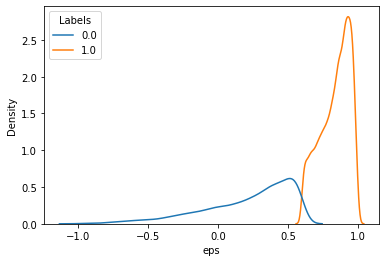

In [8]:
gal.plot.circ_kde("eps",labels=labels_th)

In [9]:
#gchop.models.JThreshold?

## Abadi+03

In [10]:
decomposer = gchop.models.JHistogram()
cmp_labels = decomposer.decompose(gal)
labels_ab = cmp_labels.labels[cmp_labels.ptypes == 'stars']
print(labels_ab)
cmp_labels.describe()

[0. 1. 0. ... 1. 0. 0.]


Particles           Deterministic mass          
              Size  Fraction               Size  Fraction
Spheroid      5856  0.157069       5.565041e+09  0.149142
Disk         31427  0.842931       3.174877e+10  0.850858

<AxesSubplot:xlabel='eps', ylabel='Density'>

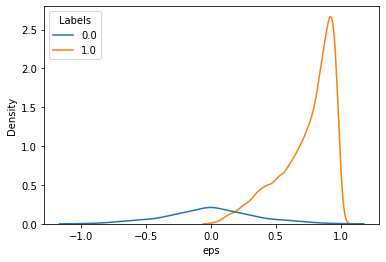

In [11]:
gal.plot.circ_kde("eps",labels=labels_ab)

## K-means

In [12]:
decomposer = gchop.models.KMeans(random_state=1111111)
cmp_labels = decomposer.decompose(gal)
labels_km = cmp_labels.labels[cmp_labels.ptypes == 'stars']
cmp_labels.describe()

Particles           Deterministic mass          
       Size  Fraction               Size  Fraction
0      9385  0.251723       8.915343e+09  0.238929
1     27898  0.748277       2.839847e+10  0.761071

<AxesSubplot:xlabel='eps', ylabel='Density'>

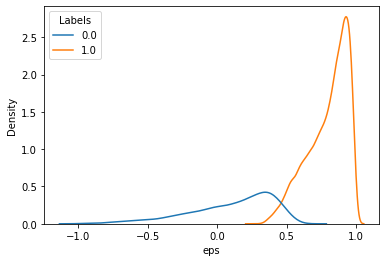

In [13]:
gal.plot.circ_kde("eps",labels=labels_km)

In [14]:
decomposer = gchop.models.KMeans(n_components=3, random_state=111111)
cmp_labels = decomposer.decompose(gal)
labels_km3 = cmp_labels.labels[cmp_labels.ptypes == 'stars']

print(cmp_labels.describe())
#gal.plot.circ_kde("eps",labels=labels_km3)




#lab0: Bulge
#lab1: Thin Disk
#lab2: Thick Disk

  Particles           Deterministic mass          
       Size  Fraction               Size  Fraction
0      4864  0.130462       4.586934e+09  0.122929
1     20676  0.554569       2.141188e+10  0.573832
2     11743  0.314969       1.131500e+10  0.303239


<AxesSubplot:xlabel='eps', ylabel='Density'>

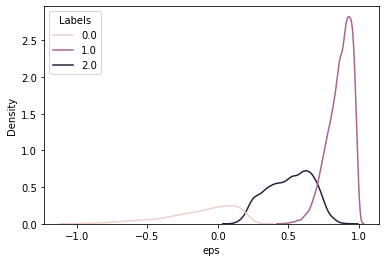

In [15]:
gal.plot.circ_kde("eps",labels=labels_km3)

In [16]:
decomposer = gchop.models.KMeans(n_components=4,random_state=206626)
cmp_labels = decomposer.decompose(gal)
labels_km4 = cmp_labels.labels[cmp_labels.ptypes == 'stars']
#lab0: Stellar halo
#lab1: Bulge
#lab2: Thin Disk
#lab3: Thick disk

cmp_labels
cmp_labels.describe()

Particles           Deterministic mass          
       Size  Fraction               Size  Fraction
0      7670  0.205724       7.377671e+09  0.197720
1      3804  0.102030       3.576927e+09  0.095861
2     14754  0.395730       1.551768e+10  0.415870
3     11055  0.296516       1.084153e+10  0.290550

<AxesSubplot:xlabel='eps', ylabel='Density'>

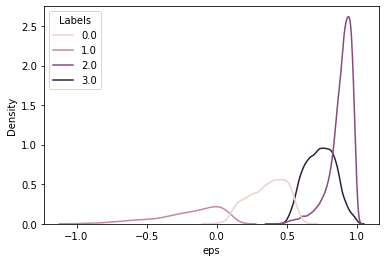

In [17]:
gal.plot.circ_kde("eps",labels=labels_km4)

## Cristiani

In [18]:
decomposer = gchop.models.JEHistogram()
cmp_labels = decomposer.decompose(gal)
labels_cr = cmp_labels.labels[cmp_labels.ptypes == 'stars']
cmp_labels
cmp_labels.describe()

Particles           Deterministic mass         
              Size  Fraction               Size Fraction
Spheroid      5795  0.155433       5.485886e+09  0.14702
Disk         31488  0.844567       3.182792e+10  0.85298

<AxesSubplot:xlabel='eps', ylabel='Density'>

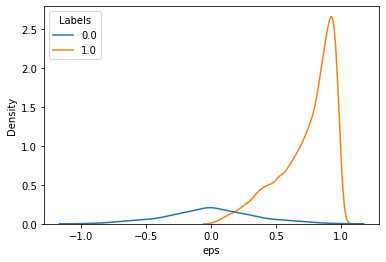

In [19]:
gal.plot.circ_kde("eps",labels=labels_cr)

## GMM

In [20]:
decomposer = gchop.models.GaussianMixture(random_state=26)
cmp_labels = decomposer.decompose(gal)

#Labels
labels_gmm = cmp_labels.labels[cmp_labels.ptypes == 'stars']

#Probabilities
describe_gmm=cmp_labels.describe()
cmp_labels.describe()

Particles          Deterministic mass           Probabilistic mass          
       Size Fraction               Size  Fraction               Size  Fraction
0     16774  0.44991       1.614934e+10  0.432798       1.702359e+10  0.456227
1     20509  0.55009       2.116447e+10  0.567202       2.029022e+10  0.543773

<AxesSubplot:xlabel='eps', ylabel='Density'>

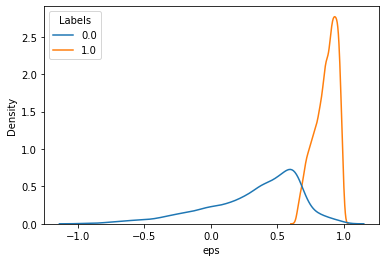

In [21]:
gal.plot.circ_kde("eps",labels=labels_gmm)

In [22]:
describe_gmm

Particles          Deterministic mass           Probabilistic mass          
       Size Fraction               Size  Fraction               Size  Fraction
0     16774  0.44991       1.614934e+10  0.432798       1.702359e+10  0.456227
1     20509  0.55009       2.116447e+10  0.567202       2.029022e+10  0.543773

In [23]:
decomposer = gchop.models.GaussianMixture(n_components=3,random_state=68448)
cmp_labels = decomposer.decompose(gal)
labels_gmm3 = cmp_labels.labels[cmp_labels.ptypes == 'stars']

#lab0: Bulge
#lab1: Thin Disk
#lab2: Thick Disk
#Probabilities
describe_gmm3=cmp_labels.describe()
cmp_labels.describe()

Particles           Deterministic mass           Probabilistic mass  \
       Size  Fraction               Size  Fraction               Size   
0      7426  0.199179       6.964852e+09  0.186656       7.502833e+09   
1     16535  0.443500       1.725916e+10  0.462541       1.662483e+10   
2     13322  0.357321       1.308980e+10  0.350803       1.318614e+10   

             
   Fraction  
0  0.201074  
1  0.445541  
2  0.353385

<AxesSubplot:xlabel='eps', ylabel='Density'>

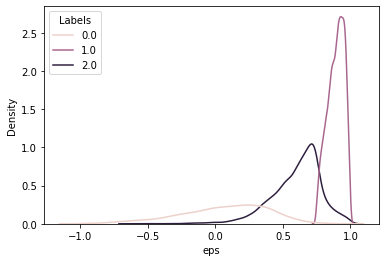

In [24]:
gal.plot.circ_kde("eps",labels=labels_gmm3)

In [25]:
decomposer = gchop.models.GaussianMixture(n_components=4, random_state=40) 
cmp_labels = decomposer.decompose(gal)
labels_gmm4 = cmp_labels.labels[cmp_labels.ptypes == 'stars']

#Con --> random_state=111806)
#lab0: Thin Disk
#lab1: Bulge
#lab2: Stellar halo
#lab3: Thick disk

#for index, value in enumerate(labels_gmm4):
#    if value == 0:
#      labels_gmm4[index] = 2
#    if value == 2:
#      labels_gmm4[index] = 0

#Probabilities
describe_gmm4=cmp_labels.describe()
cmp_labels.describe()

Particles           Deterministic mass           Probabilistic mass  \
       Size  Fraction               Size  Fraction               Size   
0      4908  0.131642       4.888114e+09  0.131000       6.603724e+09   
1      7985  0.214173       7.456528e+09  0.199833       7.092121e+09   
2     11912  0.319502       1.263457e+10  0.338603       1.185579e+10   
3     12478  0.334683       1.233460e+10  0.330564       1.176218e+10   

             
   Fraction  
0  0.176978  
1  0.190067  
2  0.317732  
3  0.315223

<AxesSubplot:xlabel='eps', ylabel='Density'>

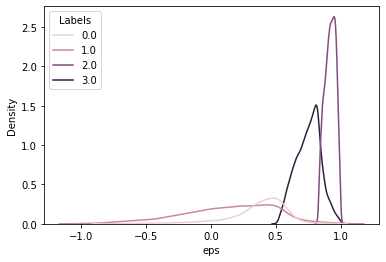

In [26]:
gal.plot.circ_kde("eps",labels=labels_gmm4)

## Auto-GMM

In [27]:
decomposer = gchop.models.AutoGaussianMixture() #njobs paralell
cmp_labels = decomposer.decompose(gal)
labels_agmm = cmp_labels.labels[cmp_labels.ptypes == 'stars']

#Probabilities
describe_agmm=cmp_labels.describe()
cmp_labels.describe()

Particles           Deterministic mass           Probabilistic mass  \
               Size  Fraction               Size  Fraction               Size   
Halo           5275  0.141485       5.224247e+09  0.140008       5.965654e+09   
Bulge          5380  0.144302       5.013491e+09  0.134360       5.094411e+09   
Cold disk      8058  0.216131       8.661160e+09  0.232117       8.271515e+09   
Warm disk     18570  0.498082       1.841491e+10  0.493515       1.798223e+10   

                     
           Fraction  
Halo       0.159878  
Bulge      0.136529  
Cold disk  0.221674  
Warm disk  0.481919

<AxesSubplot:xlabel='eps', ylabel='Density'>

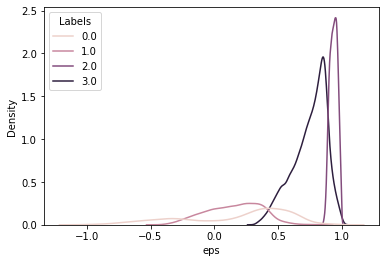

In [28]:
gal.plot.circ_kde("eps",labels=labels_agmm)

# DataFrame stars particles

In [29]:
dfs = gal.stars.to_dataframe()

In [30]:
print(len(gal.stars.x))
print(len(labels_th))

37393
37393


In [31]:
dfs.isnull().sum()

ptype             0
ptypev            0
m                 0
x                 0
y                 0
z                 0
vx                0
vy                0
vz                0
softening         0
potential         0
kinetic_energy    0
total_energy      0
Jx                0
Jy                0
Jz                0
dtype: int64

In [32]:
#Agrego labels al data frame
dfs["lab_th"]=labels_th
dfs["lab_ab"]=labels_ab
dfs["lab_cr"]=labels_cr
dfs["lab_km"]=labels_km
dfs["lab_km3"]=labels_km3
dfs["lab_km4"]=labels_km4
#Para los GMM se usa la probabilididad, no los labels
dfs["lab_gmm"]=labels_gmm
dfs["lab_gmm3"]=labels_gmm3
dfs["lab_gmm4"]=labels_gmm4
dfs["lab_agmm"]=labels_agmm

In [33]:
dfs

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,stars,0,9.745897e+05,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
2,stars,0,6.935776e+05,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,stars,0,1.070959e+06,-0.233303,-0.256464,-0.370506,-9.678900,-5.458488,-0.866013,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,stars,0,6.013803e+05,-0.075262,-0.200221,-0.282568,16.644463,8.046805,-16.925347,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37388,stars,0,9.867470e+05,135.738559,-160.160626,-15.369098,-56.741920,57.947940,121.877589,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
37389,stars,0,8.290853e+05,14.748290,15.584324,-5.206648,-6.194351,263.651947,313.783409,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
37390,stars,0,1.004103e+06,16.885028,56.265101,-2.875864,-43.605196,304.321445,11.364916,0.0,...,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
37391,stars,0,1.526682e+06,270.481924,-80.307674,15.246717,-89.287180,-51.203767,-23.223115,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0


<AxesSubplot:xlabel='x', ylabel='y'>

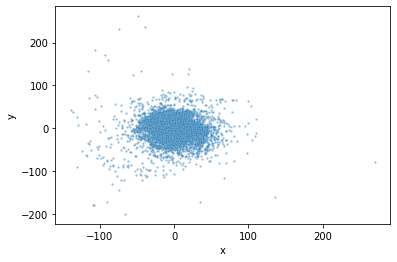

In [34]:
gal.plot.scatter("x","y", alpha=.5, s=5, ptypes=['stars'])

# Save DataFrame Stars 

In [ ]:
gal.to_dataframe().to_p

In [35]:
#dfs.to_pickle('df_stars_gal394242_rvir.pkl')

In [37]:
gal.to_pickle('gal394242_rvir.pkl')

AttributeError: 'Galaxy' object has no attribute 'to_pickle'

# df Probabilities

In [ ]:
#describe_gmm.to_pickle('describe_gmm_gal394242_rvir.pkl')

In [ ]:
#describe_gmm3.to_pickle('describe_gmm3_gal394242_rvir.pkl')

In [ ]:
#describe_gmm4.to_pickle('describe_gmm4_gal394242_rvir.pkl')

In [ ]:
#describe_agmm.to_pickle('describe_agmm_gal394242_rvir.pkl')